# Chapter 06 -- Hierarchical Indexing

## Topics Covered

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#MultiIndexing">MultiIndexing </a>
    
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#Basic-Indexing">Multi-Indexed Selection</a>   
    
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#xs()-method-for-cross-sections"> xs() method for cross sections </a>
    
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#Advanced-Indexing-with-.loc-indexer">    Advanced Indexing with .loc indexer

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#Using-Boolean-operators-with-.loc-indexer"> Using Boolean operators with .loc indexer </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#stack()-and-unstack()-methods"> stack() and unstack() methods </a> 

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#Resources"> Resources </a> 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Index
from IPython.display import Image

Simply put, a MultiIndex (also referred to as a hierarchical index) allows multiple index levels within a single index.  Higher dimensional data can be represented in a one-dimensional Series or a two-dimensional DataFrame.  Start with the creation of a synthetic DataFrame whose values are used to represent the number of traffic violations issued in cell #3 below.  

pandas provide constructor methods allowing components to be defined separately.  The construction of the index and columns below is self-explanatory.

For the data component:  The first data = assignment constructs an array using numpy's random number generator with the round() method used to return the integer portion.  The second date = assignment multiples the array of integers by 100 and floor divides by 5, and finally taking the absolute value.

The tickets = assignment constructs the DataFrame from the constituents.

## MultiIndexing

In [2]:
index = pd.MultiIndex.from_product([[2012, 2013, 2014, 2015], ['1', '2', '3']],
                                   names=['year', 'month'])
columns=pd.MultiIndex.from_product([['city', 'suburbs', 'rural'], ['day', 'night']],
                                    names=['area', 'when'])

data = np.round(np.random.randn(12, 6),2)
data = abs(np.floor_divide(data[:] * 100, 5))

tickets = pd.DataFrame(data, index=index, columns=columns).sort_index().sort_index(axis=1)

In [3]:
index

MultiIndex(levels=[[2012, 2013, 2014, 2015], ['1', '2', '3']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['year', 'month'])

Notice how the MultiIndex displayed above contains multiple levels of indexing, in this case 'year' and 'month' along the row dimension. The levels act as labels for each data value encoding these names.

In SAS, the terminology is 'month' nested within 'year'.  Said another way, 'month' is the inner-most level of the index.

In [4]:
tickets.columns

MultiIndex(levels=[['city', 'rural', 'suburbs'], ['day', 'night']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['area', 'when'])

Similiarly, the indexing for columns contains multiple levels, with the name 'area' labeling the outer levels 'city', 'rural', and 'suburbs'.  'when' is the name for the inner levels 'day' and 'night'.

In [5]:
tickets

area        city       rural       suburbs      
when         day night   day night     day night
year month                                      
2012 1      39.0  18.0  20.0   7.0    12.0   9.0
     2      12.0  25.0   3.0  17.0     7.0  30.0
     3      13.0  27.0  34.0  32.0    12.0  30.0
2013 1       2.0   7.0  12.0   9.0    30.0  51.0
     2      37.0  10.0   2.0   0.0     8.0  28.0
     3      17.0  17.0  17.0  20.0    15.0  18.0
2014 1      16.0  42.0  25.0  20.0    14.0   8.0
     2      27.0   9.0   8.0  51.0     5.0   2.0
     3       9.0  33.0  13.0  11.0    26.0  15.0
2015 1       3.0  21.0   7.0   8.0    33.0  34.0
     2       1.0   2.0  24.0   7.0     2.0   2.0
     3      13.0   2.0   1.0  19.0     1.0   1.0

In [6]:
tickets.shape

(12, 6)

Another SAS-like way to think of a MultiIndex is nested group-by's illustrated in cell below with PROC SORT.  The resulting SAS data set tickets is 'tall' and 'skinny' with one observation for each of the nested levels.   

Below, we will illustrate how <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%206%20--%20Hierarchical%20Indexing.ipynb#stack-and-unstack-methods"> 'stacking' </a> the DataFrame can be used to reshape it to a form similiar to the SAS data set tickets.


````
    /******************************************************/
    /* c06_tickets_proc_sort.sas                          */
    /******************************************************/
    34       proc sort;
    35       by year month area nd;
    NOTE: 72 observations were read from "WORK.tickets"
    NOTE: Data set "WORK.tickets" has 72 observation(s) and 5 variable(s)
````

A SAS analog of the tickets Dataframe is rendered using PROC TABULATE.  Unlike the DataFrame methods illustrated here, the physical shape of the SAS data set is not changed.  In this case PROC TABULATE processes the 'tall' SAS data set to produce printed output shaped like the 'tickets' DataFrame.

````
    /******************************************************/
    /* c06_tickets_proc_tabulate.sas                      */
    /******************************************************/
    12       data tickets;
    13       length area $ 7;
    14       call streaminit(time());
    15       do year = 2012 to 2015;
    16          do month = 1 to 3;
    17             do area = 'City', 'Suburbs', 'Rural';
    18                do nd = 'Night', 'Day';
    19                   tickets = abs(int(rand( 'NORMAL')*100));
    20                   output;
    21                end;
    22             end;
    23          end;
    24       end;
    25       proc tabulate;
    26          var tickets;;
    27          class area nd year month;
    28             table year * month ,
    29                   area=' ' * nd=' ' * sum=' ' * tickets=' ';
````

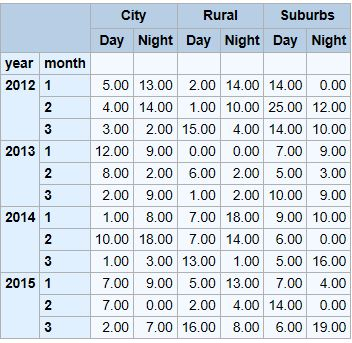

In [7]:
Image(filename='Anaconda3\\output\\tabulate.JPG')

## Multi-Indexed Selection

The tickets DataFrame is essentially four-dimensional with area nested within when for columns, and month nested within year for rows.  The multi-indexing for both rows and columns make sub-setting operations straightforward.  In this case, selecting by the index label 'rural' returns an entire DataFrame.  Strictly speaking, 'rural' is a level in the column MultiIndex illustrated in cell #5 above.

Select all rows by the 'rural' level.

In [8]:
tickets['rural']

when         day  night
year month             
2012 1      20.0    7.0
     2       3.0   17.0
     3      34.0   32.0
2013 1      12.0    9.0
     2       2.0    0.0
     3      17.0   20.0
2014 1      25.0   20.0
     2       8.0   51.0
     3      13.0   11.0
2015 1       7.0    8.0
     2      24.0    7.0
     3       1.0   19.0

Select all rows for tickets issued in the city at night.

In [9]:
tickets['city', 'night']

year  month
2012  1        18.0
      2        25.0
      3        27.0
2013  1         7.0
      2        10.0
      3        17.0
2014  1        42.0
      2         9.0
      3        33.0
2015  1        21.0
      2         2.0
      3         2.0
Name: (city, night), dtype: float64

Multiple keys can be specified.  Above, the request is for those tickets issued at 'night' in the 'city'.   In this instance a Series is returned.

The examples in cells #8 and #9 work by selecting labels from 'area' which is the outer-most MultiIndex level for columns in the tickets DataFrame.  Said another way, 'when' ('day' or 'night') is nested inside 'area'.

Another method to select rows and columns nested inside a hierarchical index is the DataFrame xs() method.  This cross-section method generally results in a smaller DataFrame than the original.

## xs() method for cross sections

The DataFrame xs() method uses the level argument to select data for rows and columns.  The example in the cell below selects the 1st month for each year.

In [10]:
tickets.xs(('1'), level='month')

area  city       rural       suburbs      
when   day night   day night     day night
year                                      
2012  39.0  18.0  20.0   7.0    12.0   9.0
2013   2.0   7.0  12.0   9.0    30.0  51.0
2014  16.0  42.0  25.0  20.0    14.0   8.0
2015   3.0  21.0   7.0   8.0    33.0  34.0

Likewise, you can request just the rows for 2013.

In [11]:
tickets.xs((2013), level='year')

area   city       rural       suburbs      
when    day night   day night     day night
month                                      
1       2.0   7.0  12.0   9.0    30.0  51.0
2      37.0  10.0   2.0   0.0     8.0  28.0
3      17.0  17.0  17.0  20.0    15.0  18.0

Selections can use multiple keys.  In this case, 2013 and month '1'.

In [12]:
tickets.xs((2013, '1'), level=('year', 'month'))

area       city       rural       suburbs      
when        day night   day night     day night
year month                                     
2013 1      2.0   7.0  12.0   9.0    30.0  51.0

The .xs method also works for columns with the optional axis=1 (for columns) argument.  In this case, the column 'night' in each of the 3 areas is selected.

In [13]:
tickets.xs(('night'), level='when', axis=1)

area        city  rural  suburbs
year month                      
2012 1      18.0    7.0      9.0
     2      25.0   17.0     30.0
     3      27.0   32.0     30.0
2013 1       7.0    9.0     51.0
     2      10.0    0.0     28.0
     3      17.0   20.0     18.0
2014 1      42.0   20.0      8.0
     2       9.0   51.0      2.0
     3      33.0   11.0     15.0
2015 1      21.0    8.0     34.0
     2       2.0    7.0      2.0
     3       2.0   19.0      1.0

## Advanced Indexing with .loc indexer

Chapter 5, Understanding Indexes covers the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%205%20--%20Understanding%20Indexes.ipynb#.loc-Indexer"> .loc indexer </a> which can also be used with hierarchical indicies.   

The colon (:) to the left of the comma (,) selects all rows.  The selection to the right of the comma (,) requests the levels 'city' and 'suburbs' from 'area'.

In [14]:
tickets.loc[:,['city', 'suburbs']]

area        city       suburbs      
when         day night     day night
year month                          
2012 1      39.0  18.0    12.0   9.0
     2      12.0  25.0     7.0  30.0
     3      13.0  27.0    12.0  30.0
2013 1       2.0   7.0    30.0  51.0
     2      37.0  10.0     8.0  28.0
     3      17.0  17.0    15.0  18.0
2014 1      16.0  42.0    14.0   8.0
     2      27.0   9.0     5.0   2.0
     3       9.0  33.0    26.0  15.0
2015 1       3.0  21.0    33.0  34.0
     2       1.0   2.0     2.0   2.0
     3      13.0   2.0     1.0   1.0

Below is a an example of partial slicing.

In [15]:
tickets.loc[2013:2014, ['city', 'suburbs']]

area        city       suburbs      
when         day night     day night
year month                          
2013 1       2.0   7.0    30.0  51.0
     2      37.0  10.0     8.0  28.0
     3      17.0  17.0    15.0  18.0
2014 1      16.0  42.0    14.0   8.0
     2      27.0   9.0     5.0   2.0
     3       9.0  33.0    26.0  15.0

The example below illustrates slicing with a range of values by providing <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%202%20--%20Data%20Structures.ipynb#tuple"> tuples </a> containing both the row slice ( 2nd month, 2013 to 3rd month 2014) and the column slice ('rural' 'day' to 'suburbs' 'day').

In [16]:
tickets.loc[(2013, '2') : (2014, '3'), ('rural', 'day') : ('suburbs', 'day')]

area       rural       suburbs
when         day night     day
year month                    
2013 2       2.0   0.0     8.0
     3      17.0  20.0    15.0
2014 1      25.0  20.0    14.0
     2       8.0  51.0     5.0
     3      13.0  11.0    26.0

The example below illustrates the .loc() indexer using multiple keys for row and column slices.

In [17]:
tickets.loc[(2013, '3'): (2014, '1')]

area        city       rural       suburbs      
when         day night   day night     day night
year month                                      
2013 3      17.0  17.0  17.0  20.0    15.0  18.0
2014 1      16.0  42.0  25.0  20.0    14.0   8.0

In [18]:
tickets.loc[(2013, '3'): (2014, '1'), "city"]

,when,day,night
year,month,,
2013,3,17.0,17.0
2014,1,16.0,42.0


## Using Boolean operators with .loc indexer

Using boolean operators with the .loc indexer permits boolean evaluations across the Dataframe values. You can use a pd.IndexSlice to permit syntax using the colon (:) rather then slice(None) syntax when specifying ranges.

The mask object returns the boolean value True which is applied to the column MultiIndex 'night' as the inner-most index level within 'city'.  Notice the shape of the DataFrame is defined by just those rows in the 'night' within 'city' column construct that evaluate True.

In [19]:
idx = pd.IndexSlice
mask = tickets[('city','night')]>25
tickets.loc[idx[mask,:,]]

area        city       rural       suburbs      
when         day night   day night     day night
year month                                      
2012 3      13.0  27.0  34.0  32.0    12.0  30.0
2014 1      16.0  42.0  25.0  20.0    14.0   8.0
     3       9.0  33.0  13.0  11.0    26.0  15.0

The example in the cell below applies the boolean 'mask2' to all values in the DataFrame

In [20]:
mask2 = tickets[('rural', 'day')]>15
tickets.loc[idx[mask2, 'city':'rurual']]

area        city       rural      
when         day night   day night
year month                        
2012 1      39.0  18.0  20.0   7.0
     3      13.0  27.0  34.0  32.0
2013 3      17.0  17.0  17.0  20.0
2014 1      16.0  42.0  25.0  20.0
2015 2       1.0   2.0  24.0   7.0

The example below applies boolean 'mask2' and also scopes the column request.  

In [21]:
tickets.loc[idx[mask2, 'rural']]

when         day  night
year month             
2012 1      20.0    7.0
     3      34.0   32.0
2013 3      17.0   20.0
2014 1      25.0   20.0
2015 2      24.0    7.0

## stack() and unstack() methods

DataFrames with hierarchical indices can use the .stack and .unstack attributes to reshape data from 'tall and skinny' to 'short and fat' formats and vice-versa.  

The .stack() attribute pivots columns into rows.  The .unstack() attribute pivots rows into columns.  Consider the examples in the cell below.  

The .unstack() attribute used without any arguments in this case pivots the 'month' rows to the inner-most index level of the columns.  'month' was the inner-most index level for rows.  Also notice how we assigned the 'unstacked' DataFrame to create the new one, df_u.

In [22]:
df_u = tickets.unstack()
df_u

area   city                               rural                                \
when    day             night               day             night               
month     1     2     3     1     2     3     1     2     3     1     2     3   
year                                                                            
2012   39.0  12.0  13.0  18.0  25.0  27.0  20.0   3.0  34.0   7.0  17.0  32.0   
2013    2.0  37.0  17.0   7.0  10.0  17.0  12.0   2.0  17.0   9.0   0.0  20.0   
2014   16.0  27.0   9.0  42.0   9.0  33.0  25.0   8.0  13.0  20.0  51.0  11.0   
2015    3.0   1.0  13.0  21.0   2.0   2.0   7.0  24.0   1.0   8.0   7.0  19.0   

area  suburbs                               
when      day            night              
month       1    2     3     1     2     3  
year                                        
2012     12.0  7.0  12.0   9.0  30.0  30.0  
2013     30.0  8.0  15.0  51.0  28.0  18.0  
2014     14.0  5.0  26.0   8.0   2.0  15.0  
2015     33.0  2.0   1.0  34.0   2.0   1.0

The MultiIndex for the columns from DataFrame df_u is shown below.  Contrast this column index with the one for tickets in cell #4 above.

In [23]:
df_u.columns

MultiIndex(levels=[['city', 'rural', 'suburbs'], ['day', 'night'], ['1', '2', '3']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['area', 'when', 'month'])

The .stack() attribute performs the reverse operation of the .unstack() attribute.  The .stack() attribute takes the inner most index level of the columns level and pivots them to the inner-most index level of the rows.  In this case the new DataFrame is called df_s.

In [24]:
df_s = tickets.stack()
df_s

area              city  rural  suburbs
year month when                       
2012 1     day    39.0   20.0     12.0
           night  18.0    7.0      9.0
     2     day    12.0    3.0      7.0
           night  25.0   17.0     30.0
     3     day    13.0   34.0     12.0
           night  27.0   32.0     30.0
2013 1     day     2.0   12.0     30.0
           night   7.0    9.0     51.0
     2     day    37.0    2.0      8.0
           night  10.0    0.0     28.0
     3     day    17.0   17.0     15.0
           night  17.0   20.0     18.0
2014 1     day    16.0   25.0     14.0
           night  42.0   20.0      8.0
     2     day    27.0    8.0      5.0
           night   9.0   51.0      2.0
     3     day     9.0   13.0     26.0
           night  33.0   11.0     15.0
2015 1     day     3.0    7.0     33.0
           night  21.0    8.0     34.0
     2     day     1.0   24.0      2.0
           night   2.0    7.0      2.0
     3     day    13.0    1.0      1.0
           night   2.0   19.0      1.0

DataFrames containing MultiIndexes can 'stack' and 'unstack' multiple levels at a time.

In [25]:
df_like_sas = pd.DataFrame(tickets.stack(level=['when', 'area']))

We can 'stack' the original tickets DataFrame by the levels 'when' and 'area' from the column MultiIndex to create a new DataFrame shaped similiarly to the SAS data set tickets. 

In [26]:
df_like_sas.shape

(72, 1)

Display the first 12 rows.

In [27]:
df_like_sas.head(12)

0
year month when  area         
2012 1     day   city     39.0
                 rural    20.0
                 suburbs  12.0
           night city     18.0
                 rural     7.0
                 suburbs   9.0
     2     day   city     12.0
                 rural     3.0
                 suburbs   7.0
           night city     25.0
                 rural    17.0
                 suburbs  30.0

## Resources

<a href="http://shop.oreilly.com/product/0636920034919.do"> Python Data Science Handbook </a>, Essential Tools for Working With Data, by Jake VanderPlas.

<a href="http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-pivoting-dataframe-objects"> Reshaping by pivoting DataFrame objects </a>, from the pandas 0.19.0 documentation.

<a href="http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking"> Reshaping by stacking and unstacking </a> from the pandas 0.19.0 documentation.

<a href="http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing"> MultiIndex / Advanced Indexing </a> from the pandas 0.19.0 documentation.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    